<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/kalman/wavelet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install pywt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import yfinance as yf

In [3]:
data=yf.download('^nsei',start='2018-02-01')[['Adj Close']]
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.tail(2)

,Date,Adj Close
1119,2022-08-19,17758.449219
1120,2022-08-22,17601.650391


In [5]:
t=data['Date']
s=data['Adj Close']

In [6]:
t.shape,s.shape

((1121,), (1121,))

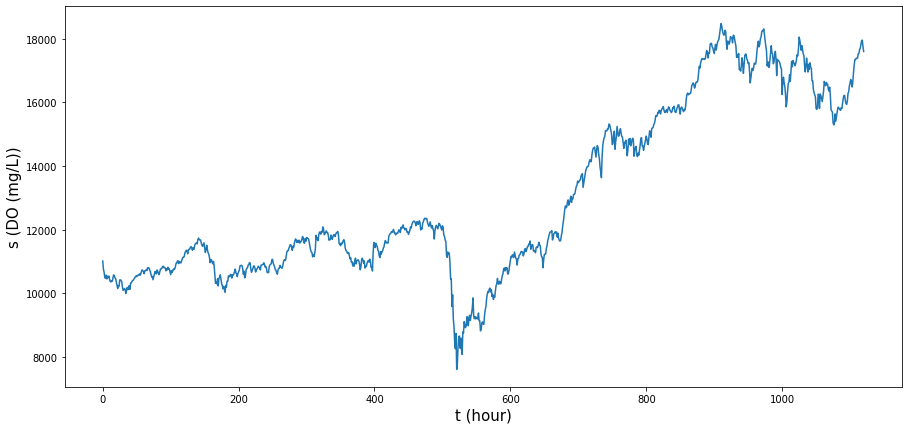

In [7]:
fig,ax = plt.subplots(figsize=(15,7))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
ax.plot(s)
ax.set_xlabel('t (hour)',fontsize=15)
ax.set_ylabel('s (DO (mg/L))',fontsize=15)

plt.show()

In [8]:
coeffs = pywt.wavedec(s,'db6','sym',level=6)
(cA6,cD6,cD5,cD4,cD3,cD2,cD1) = coeffs

In [9]:
#print('cA6 = ',cA6)
#print('cD6 = ',cD6)

In [10]:
print(len(s))
print(len(cA6))
print(len(cD6))

1121
28
28


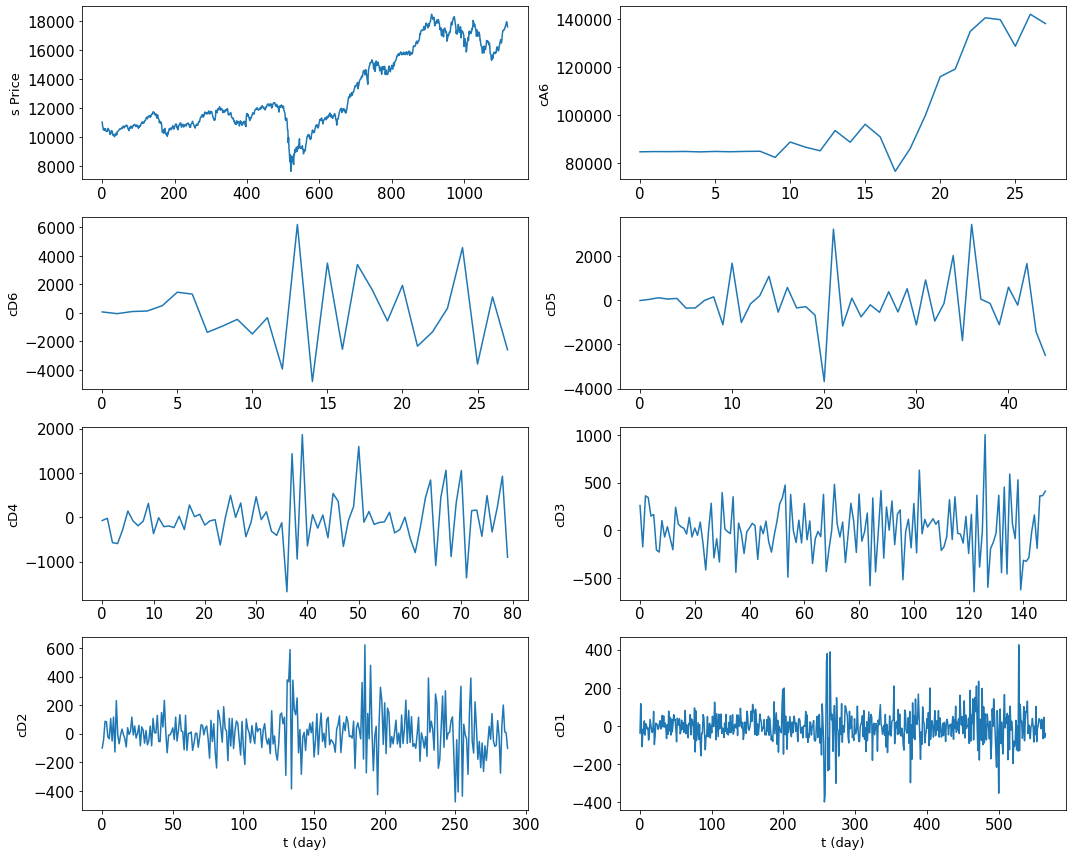

In [11]:
fig,axs = plt.subplots(4,2,figsize=(15,12))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[0,0].plot(s)
axs[0,0].set_ylabel('s Price',fontsize=13)
axs[0,1].plot(cA6)
axs[0,1].set_ylabel('cA6',fontsize=13)
axs[1,0].plot(cD6)
axs[1,0].set_ylabel('cD6',fontsize=13)
axs[1,1].plot(cD5)
axs[1,1].set_ylabel('cD5',fontsize=13)
axs[2,0].plot(cD4)
axs[2,0].set_ylabel('cD4',fontsize=13)
axs[2,1].plot(cD3)
axs[2,1].set_ylabel('cD3',fontsize=13)
axs[3,0].plot(cD2)
axs[3,0].set_ylabel('cD2',fontsize=13)
axs[3,0].set_xlabel('t (day)',fontsize=13)
axs[3,1].plot(cD1)
axs[3,1].set_ylabel('cD1',fontsize=13)
axs[3,1].set_xlabel('t (day)',fontsize=13)
plt.tight_layout()
plt.show()

In [12]:
s_r = pywt.waverec(coeffs,'db6','sym')

In [13]:
s_r = s_r[:-1]


In [14]:
s_r.shape

(1121,)

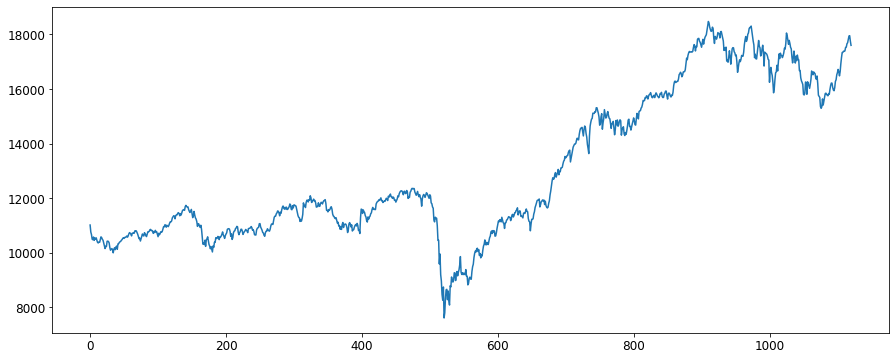

In [15]:
fig,ax = plt.subplots(figsize=(15,6),sharex=False)
#ax.plot(s.values)
ax.plot(s_r)
plt.show()

In [16]:
cA06 = np.zeros(len(cA6))
cD06 = np.zeros(len(cD6))
cD05 = np.zeros(len(cD5))
cD04 = np.zeros(len(cD4))
cD03 = np.zeros(len(cD3))
cD02 = np.zeros(len(cD2))
cD01 = np.zeros(len(cD1))

In [17]:
A6 = pywt.waverec((cA6,cD06,cD05,cD04,cD03,cD02,cD01),'db6','sym')
D6 = pywt.waverec((cA06,cD6,cD05,cD04,cD03,cD02,cD01),'db6','sym')
D5 = pywt.waverec((cA06,cD06,cD5,cD04,cD03,cD02,cD01),'db6','sym')
D4 = pywt.waverec((cA06,cD06,cD05,cD4,cD03,cD02,cD01),'db6','sym')
D3 = pywt.waverec((cA06,cD06,cD05,cD04,cD3,cD02,cD01),'db6','sym')
D2 = pywt.waverec((cA06,cD06,cD05,cD04,cD03,cD2,cD01),'db6','sym')
D1 = pywt.waverec((cA06,cD06,cD05,cD04,cD03,cD02,cD1),'db6','sym')


In [18]:
A6 = A6[:-1]
D6 = D6[:-1]
D5 = D5[:-1]
D4 = D4[:-1]
D3 = D3[:-1]
D2 = D2[:-1]
D1 = D1[:-1]

In [19]:
A5 = A6 + D6
A4 = A6 + D6 + D5
A3 = A6 + D6 + D5 + D4
A2 = A6 + D6 + D5 + D4 + D3
A1 = A6 + D6 + D5 + D4 + D3 + D2


In [20]:
s_r = A6 + D6 + D5 + D4 + D3 + D2 + D1

In [21]:
t.shape,D1.shape

((1121,), (1121,))

In [22]:
#t_s=t[1:]

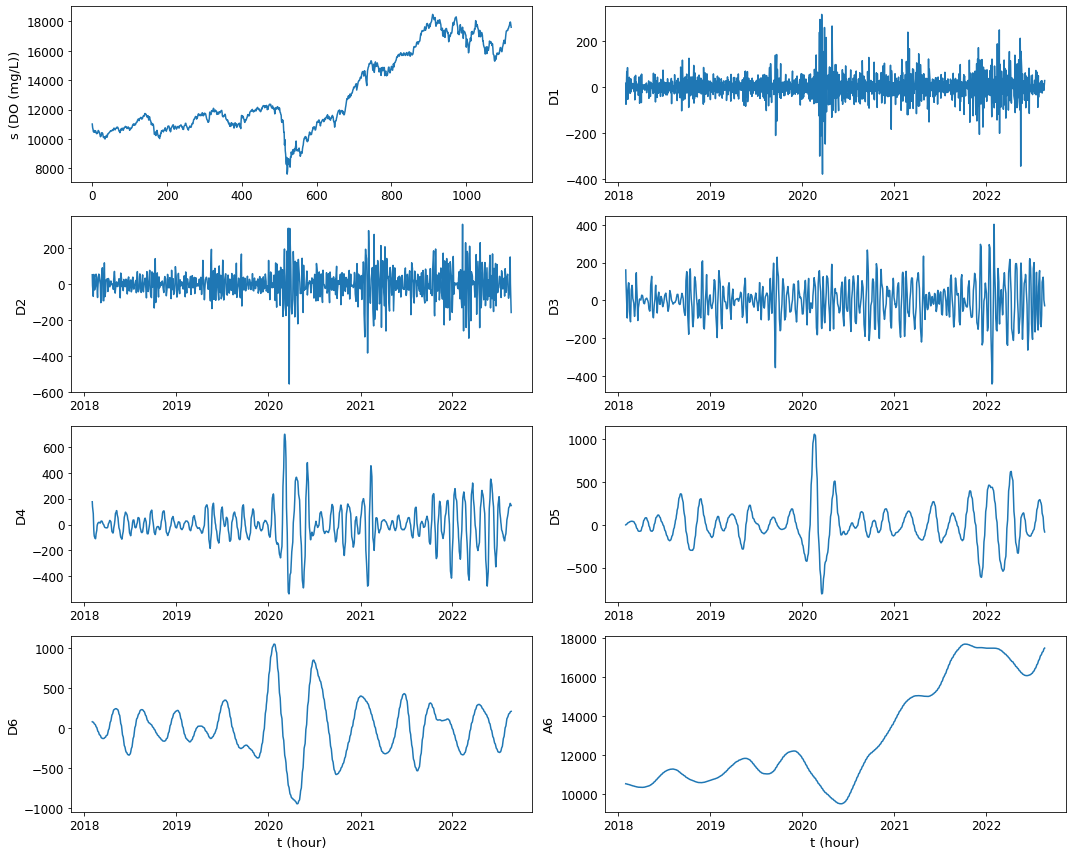

In [23]:
if t.shape==D1.shape:
    fig,axs = plt.subplots(4,2,figsize=(15,12))
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    axs[0,0].plot(s)
    axs[0,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[0,1].plot(t,D1)
    axs[0,1].set_ylabel('D1',fontsize=13)
    axs[1,0].plot(t,D2)
    axs[1,0].set_ylabel('D2',fontsize=13)
    axs[1,1].plot(t,D3)
    axs[1,1].set_ylabel('D3',fontsize=13)
    axs[2,0].plot(t,D4)
    axs[2,0].set_ylabel('D4',fontsize=13)
    axs[2,1].plot(t,D5)
    axs[2,1].set_ylabel('D5',fontsize=13)
    axs[3,0].plot(t,D6)
    axs[3,0].set_ylabel('D6',fontsize=13)
    axs[3,0].set_xlabel('t (hour)',fontsize=13)
    axs[3,1].plot(t,A6)
    axs[3,1].set_ylabel('A6',fontsize=13)
    axs[3,1].set_xlabel('t (hour)',fontsize=13)
    plt.tight_layout()

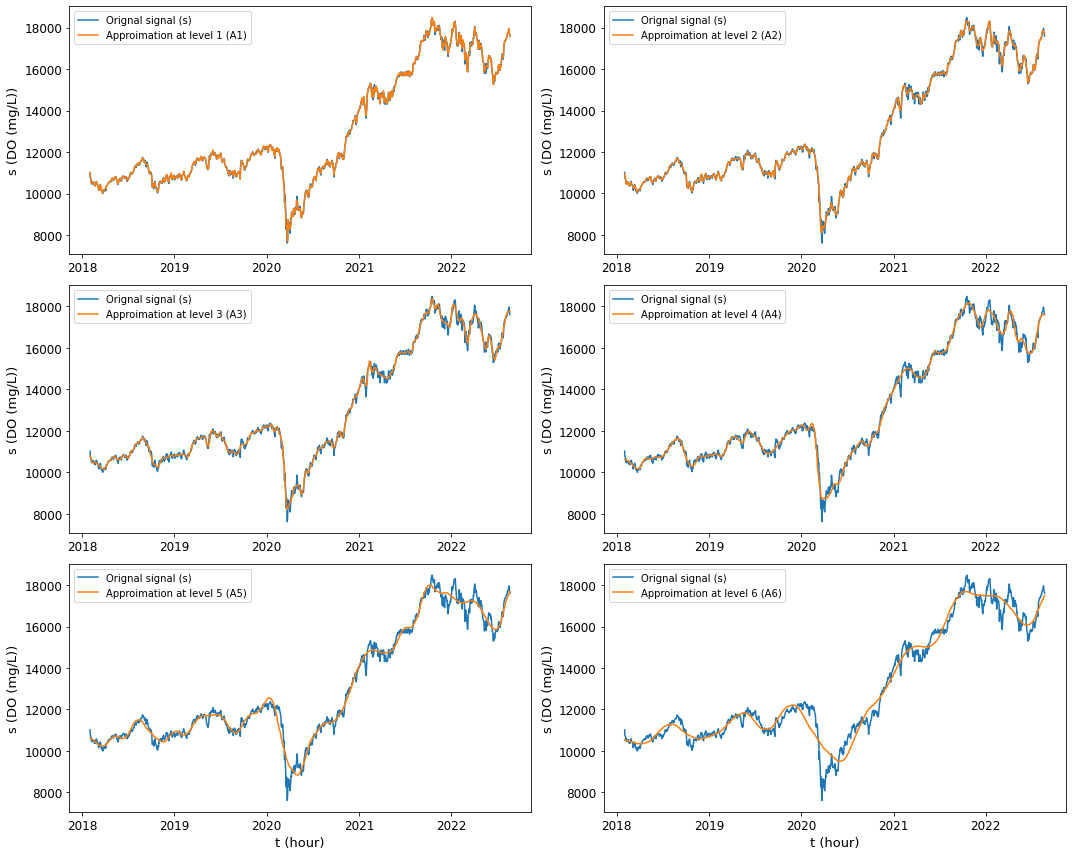

In [24]:
if t.shape==D1.shape:
    fig,axs = plt.subplots(3,2,figsize=(15,12))
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    axs[0,0].plot(t,s)
    axs[0,0].plot(t[:],A1)
    axs[0,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[0,0].legend(('Orignal signal (s)','Approimation at level 1 (A1)'),loc='best')
    axs[0,1].plot(t,s)
    axs[0,1].plot(t[:],A2)
    axs[0,1].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[0,1].legend(('Orignal signal (s)','Approimation at level 2 (A2)'),loc='best')
    axs[1,0].plot(t,s)
    axs[1,0].plot(t[:],A3)
    axs[1,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[1,0].legend(('Orignal signal (s)','Approimation at level 3 (A3)'),loc='best')
    axs[1,1].plot(t,s)
    axs[1,1].plot(t[:],A4)
    axs[1,1].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[1,1].legend(('Orignal signal (s)','Approimation at level 4 (A4)'),loc='best')
    axs[2,0].plot(t,s)
    axs[2,0].plot(t[:],A5)
    axs[2,0].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[2,0].legend(('Orignal signal (s)','Approimation at level 5 (A5)'),loc='best')
    axs[2,0].set_xlabel('t (hour)',fontsize=13)
    axs[2,1].plot(t,s)
    axs[2,1].plot(t[:],A6)
    axs[2,1].set_ylabel('s (DO (mg/L))',fontsize=13)
    axs[2,1].legend(('Orignal signal (s)','Approimation at level 6 (A6)'),loc='best')
    axs[2,1].set_xlabel('t (hour)',fontsize=13)
    plt.tight_layout()

    plt.show()

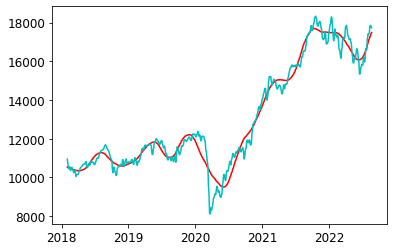

In [25]:
if t.shape!=D1.shape:
    plt.plot(t[1:],A6,color='r')
    plt.plot(t[1:],A2,color='c');
else:
    plt.plot(t[:],A6,color='r')
    plt.plot(t[:],A2,color='c');

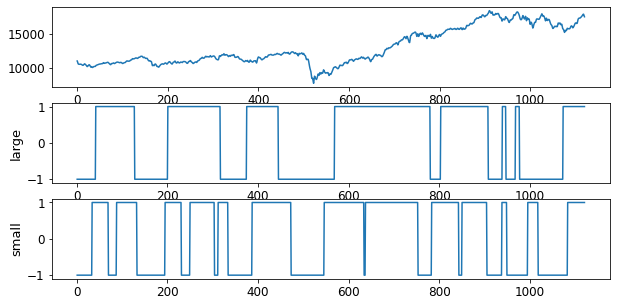

In [26]:
fig,axs = plt.subplots(3,1,figsize=(10,5))
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
axs[1].plot(np.sign(pd.Series(A6).diff()))
axs[2].plot(np.sign(pd.Series(A5).diff()))
axs[2].set_ylabel('small',fontsize=13)
axs[1].set_ylabel('large',fontsize=13)
axs[0].plot(A1)
plt.show()

In [27]:
A1.shape,A6.shape

((1121,), (1121,))

In [28]:
recon1=pd.concat([data,pd.Series(A5)],axis=1)

In [29]:
recon=pd.concat([data,pd.Series(A4)],axis=1)

In [30]:
recon.columns =['Date','Close','Series']

In [31]:
recon1.columns =['Date','Close','Series']

In [32]:
recon['signal']=np.sign(recon['Series'].diff())
recon1['signal']=np.sign(recon1['Series'].diff())


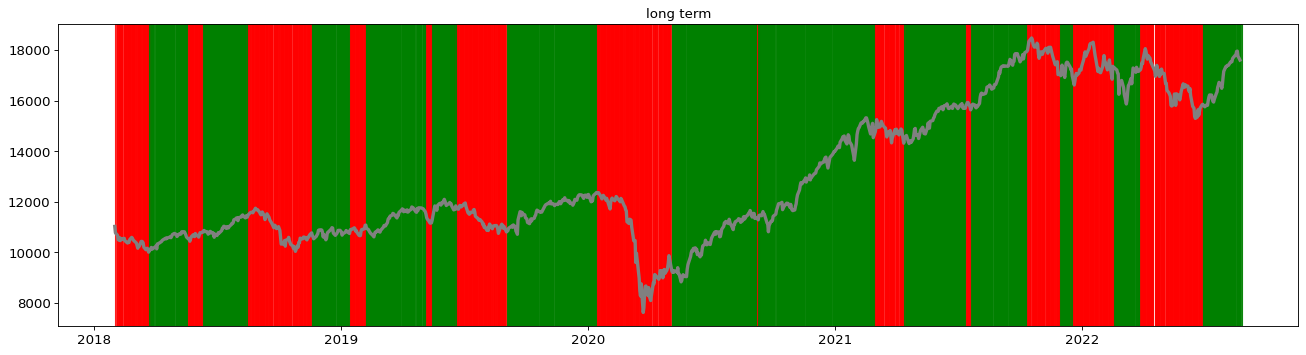

In [33]:
import datetime
plt.figure(figsize=(20,5), dpi=80)
plt.plot(data["Date"], (data['Adj Close'].values),color='grey',linewidth=3);
recessions = recon1.loc[recon1["signal"] == -1, 'Date']
nonrecession = recon1.loc[recon1['signal']==1,'Date']
for day in recessions:
    plt.axvspan(day, day + datetime.timedelta(days=3), color="red", alpha=0.8)
for day in nonrecession:
    plt.axvspan(day, day + datetime.timedelta(days=3), color="green", alpha=0.9)
plt.title('long term')    
plt.show()    

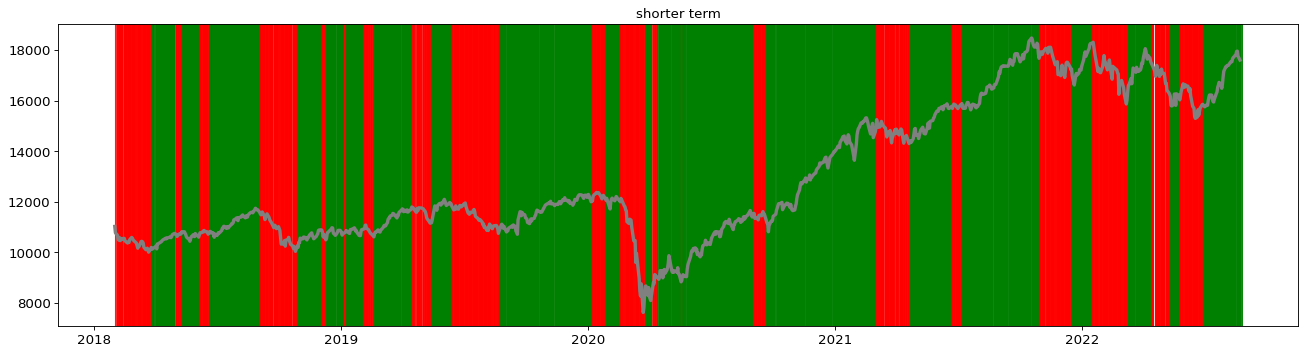

In [34]:
import datetime
plt.figure(figsize=(20,5), dpi=80)
plt.plot(data["Date"], (data['Adj Close'].values),color='grey',linewidth=3);
recessions = recon.loc[recon["signal"] == -1, 'Date']
nonrecession = recon.loc[recon['signal']==1,'Date']
for day in recessions:
    plt.axvspan(day, day + datetime.timedelta(days=3), color="red", alpha=0.8)
for day in nonrecession:
    plt.axvspan(day, day + datetime.timedelta(days=3), color="green", alpha=0.9)
plt.title('shorter term')
plt.show()    